## Import relevant libraries

In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import chart_studio.plotly as py
import plotly.express as px
%matplotlib inline

In [2]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

## Read data

In [259]:
data = pd.read_excel('Data_Skiresorts_Final.xlsx')
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Skiresort_ID       355 non-null    int64  
 1   Bergfex_ID         355 non-null    object 
 2   Ort                355 non-null    object 
 3   PLZ                355 non-null    int64  
 4   Unnamed: 4         355 non-null    object 
 5   Höhendifferenz in  355 non-null    int64  
 6   Min Höhe in        355 non-null    int64  
 7   Max Höhe in m      355 non-null    int64  
 8   Pisten_km          351 non-null    float64
 9   blaue_Piste        351 non-null    float64
 10  rote_Piste         351 non-null    float64
 11  schwarze_Piste     351 non-null    float64
 12  Anzahl_Bahnen      355 non-null    int64  
 13  Preis in CHF       294 non-null    float64
 14  Preis in EUR       294 non-null    float64
 15  Kanton_Kuerzel     355 non-null    object 
 16  SPRACHCODE         355 non

## Transform data

Print columns

In [260]:
df.columns

Index(['Skiresort_ID', 'Bergfex_ID', 'Ort', 'PLZ', 'Unnamed: 4',
       'Höhendifferenz in', 'Min Höhe in', 'Max Höhe in m', 'Pisten_km',
       'blaue_Piste', 'rote_Piste', 'schwarze_Piste', 'Anzahl_Bahnen',
       'Preis in CHF', 'Preis in EUR', 'Kanton_Kuerzel', 'SPRACHCODE',
       'Geo Shape', 'Breitengrad', 'Längengrad', '2000er_Schwelle'],
      dtype='object')

Rename columns

In [261]:
df.rename(columns={'Ort': 'location', 
                   'PLZ': 'zip_code', 
                   'Unnamed: 4': 'ski_resort_name',
                   'Höhendifferenz in': 'altitude_difference', 
                   'Min Höhe in': 'lowest_point', 
                   'Max Höhe in m': 'highest_point', 
                   'Pisten_km': 'total_slopes_kilometres',
                   'blaue_Piste': 'blue_slopes_kilometres', 
                   'rote_Piste':'red_slopes_kilometres', 
                   'schwarze_Piste':'black_slopes_kilometres', 
                   'Anzahl_Bahnen':'skilift_number',
                   'Preis in CHF':'price',
                   'Preis in EUR': 'price_eur',
                   'Kanton_Kuerzel': 'canton',
                   'SPRACHCODE': 'language_code',
                   'Geo Shape':'geo_shape',
                   'Breitengrad': 'latitude',
                   'Längengrad':'longitude',
                   '2000er_Schwelle':'threshold_2000'}, inplace=True)

In [268]:
df.loc[(df['highest_point'] > 1999), 'above_2000'] = 1
df.loc[(df['highest_point'] < 2000), 'above_2000'] = 0
df.loc[(df['highest_point'] > 1999), 'below_2000'] = 0
df.loc[(df['highest_point'] < 2000), 'below_2000'] = 1


## Analysis of Max Altitude of Ski resort

### Create Pie chart

Sum values within two columns

In [269]:
df_sum_height = df[['below_2000', 'above_2000']].sum()


Build pie chart 

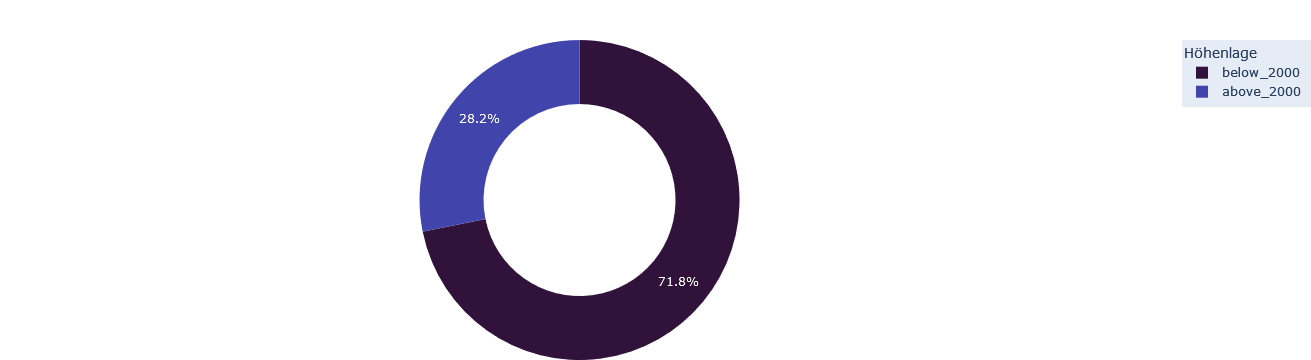

In [270]:
fig_pie = px.pie(df_sum_height, 
                 values=df_sum_height, 
                 names = df_sum_height.index, 
                 hole=.6,  
                 color_discrete_sequence=px.colors.sequential.Turbo
                )

fig_pie.update_layout(height = 300,
                      margin={"r":0,"t":40,"l":0,"b":0},
                      showlegend = True,
                      legend=dict(title="Höhenlage",))

fig_pie.update_layout(legend=dict(
    bgcolor = 'rgb(229,236,246)'))

fig_pie.show()

Save it as html file

In [122]:
fig_pie.write_html('Pie_Chart.html')

### Create Bar chart

Create dataframe

In [271]:
df.columns

Index(['Skiresort_ID', 'Bergfex_ID', 'location', 'zip_code', 'ski_resort_name',
       'altitude_difference', 'lowest_point', 'highest_point',
       'total_slopes_kilometres', 'blue_slopes_kilometres',
       'red_slopes_kilometres', 'black_slopes_kilometres', 'skilift_number',
       'price', 'price_eur', 'canton', 'language_code', 'geo_shape',
       'latitude', 'longitude', 'threshold_2000', 'above_200', 'below_2000',
       'above_2000'],
      dtype='object')

In [273]:
df_canton_height = df.groupby('canton')['above_2000','below_2000'].sum().sort_values(['above_2000'],ascending=False).reset_index()
df_canton_height.head(5)

C:\Users\mariu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,canton,above_2000,below_2000
0,VS,33.0,12.0
1,GR,33.0,28.0
2,BE,12.0,60.0
3,SG,5.0,20.0
4,VD,4.0,17.0


Create chart


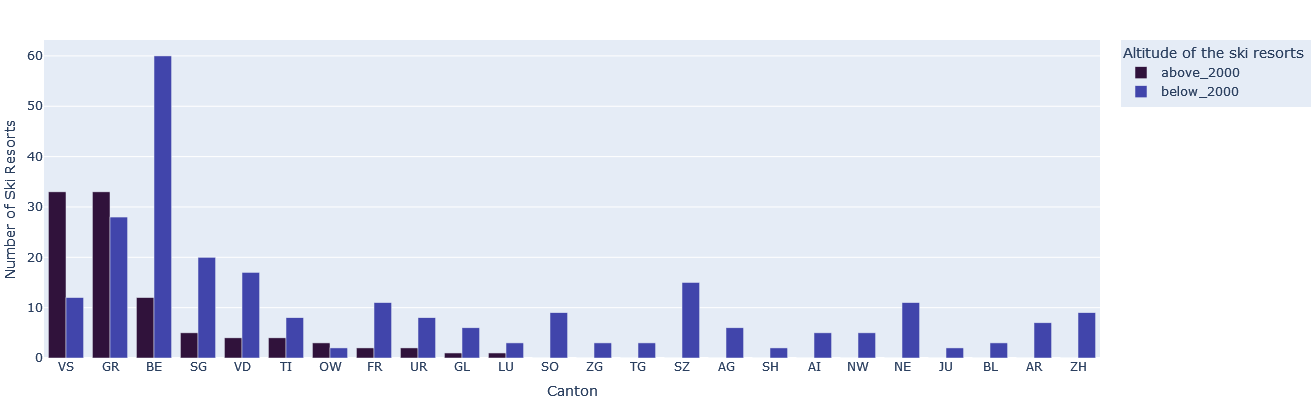

In [276]:
fig_bar = px.bar(df_canton_height, 
                 x='canton', 
                 y = ["above_2000","below_2000"],
                 height=400,
                 barmode='group',
                 labels={'canton':'Canton', 'value': 'Number of Ski Resorts'},
                 color_discrete_sequence=px.colors.sequential.Turbo
)

fig_bar.update_layout(margin={"r":0,"t":40,"l":0,"b":0},
                      showlegend = True,
                      legend=dict(title="Altitude of the ski resorts",
                                  bgcolor = 'rgb(229,236,246)')
                     )

fig_bar.show()

Save it as html file

In [125]:
fig_bar.write_html('Bar_Plot_Höhe.html')

### Create Maps

#### PX.scatter

Map with px.scatter function from plotly

In [277]:
df.columns

Index(['Skiresort_ID', 'Bergfex_ID', 'location', 'zip_code', 'ski_resort_name',
       'altitude_difference', 'lowest_point', 'highest_point',
       'total_slopes_kilometres', 'blue_slopes_kilometres',
       'red_slopes_kilometres', 'black_slopes_kilometres', 'skilift_number',
       'price', 'price_eur', 'canton', 'language_code', 'geo_shape',
       'latitude', 'longitude', 'threshold_2000', 'above_200', 'below_2000',
       'above_2000'],
      dtype='object')

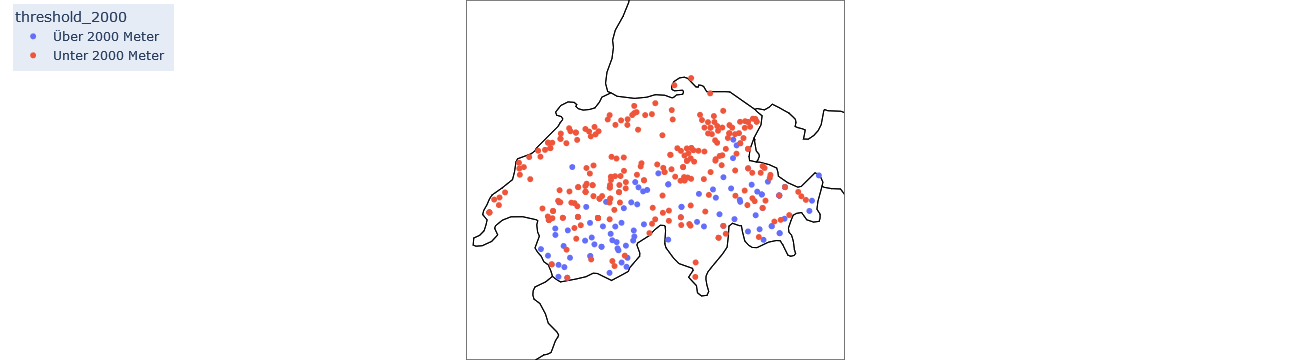

In [279]:
fig_standard_all = px.scatter_geo(df,
                    lat=df.latitude,
                    lon=df.longitude,
                    color = df.threshold_2000,
                    hover_name="ski_resort_name"
                                 )
fig_standard_all.update_layout(
    geo_scope='europe',
    margin={"r":0,"t":0,"l":0,"b":0},
    showlegend = True,
    legend=dict(yanchor="top",
                y=0.99,
                xanchor="left",
                x=0.01,
                bgcolor = 'rgb(229,236,246)')
)

fig_standard_all.update_geos(fitbounds="locations",
                             visible=False, 
                             resolution=50,
                             showcountries=True, 
                             countrycolor="Black",)

fig_standard_all.show()

Save it as a html file

In [128]:
fig_standard_all.write_html('Map_Switzerland_Standard.html')

#### scatter_mapbox

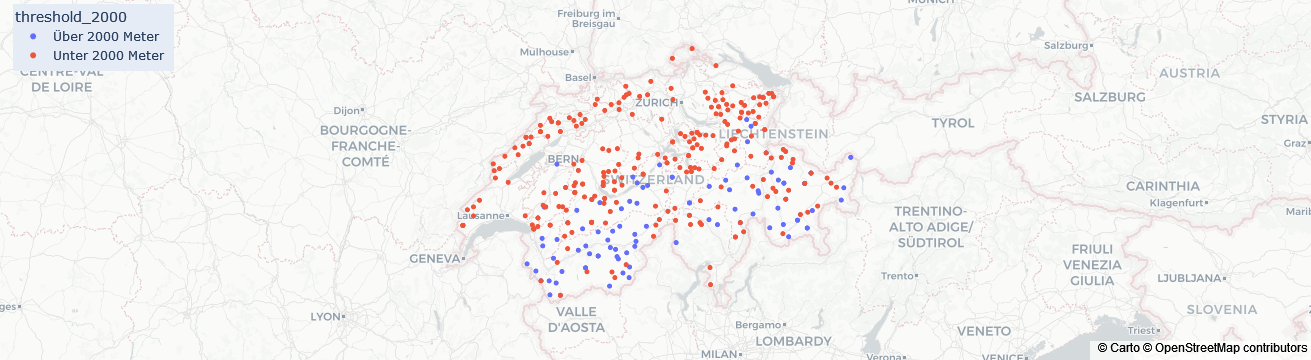

In [280]:
fig_scatter = px.scatter_mapbox(df, 
                             lon = df.longitude, 
                             lat = df.latitude,
                             zoom = 6,
                             color = df.threshold_2000,
                             hover_name="ski_resort_name"
)

fig_scatter.update_layout(showlegend = True,
                          legend=dict(
                          yanchor="top",
                          y=0.99,
                          xanchor="left",
                          x=0.01,
                          bgcolor = 'rgb(229,236,246)'),
                          margin={"r":0,"t":0,"l":0,"b":0},
                          mapbox_style = 'carto-positron')
                             
fig_scatter.show()

In [130]:
fig_scatter.write_html('Map_Switzerland_scatter_mapbox.html')

## Analysis of Ticket Prices

Drop all values with na-values in column "Preis"df['Preis'].notna()

In [378]:
df.price.isna().sum()

61

In [379]:
df_price = df[df['price'].notna()].copy()

### Correlation Matrix

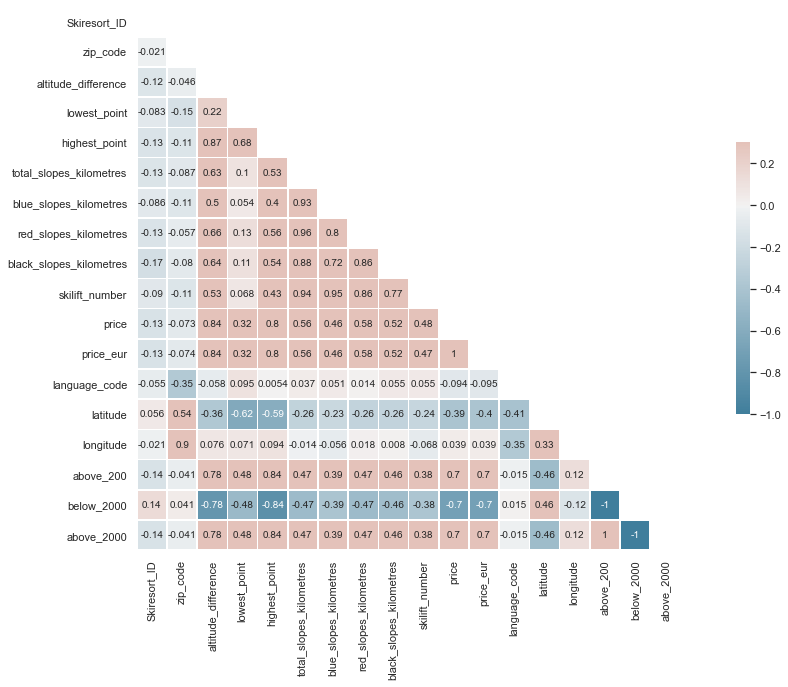

In [398]:
corr = df_price.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
fig = sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5}, 
            annot=True,
            annot_kws={"fontsize":10})


ax.figure.savefig('heatmap.png', dpi=300)

### Scatter Plot with Price and difference in height

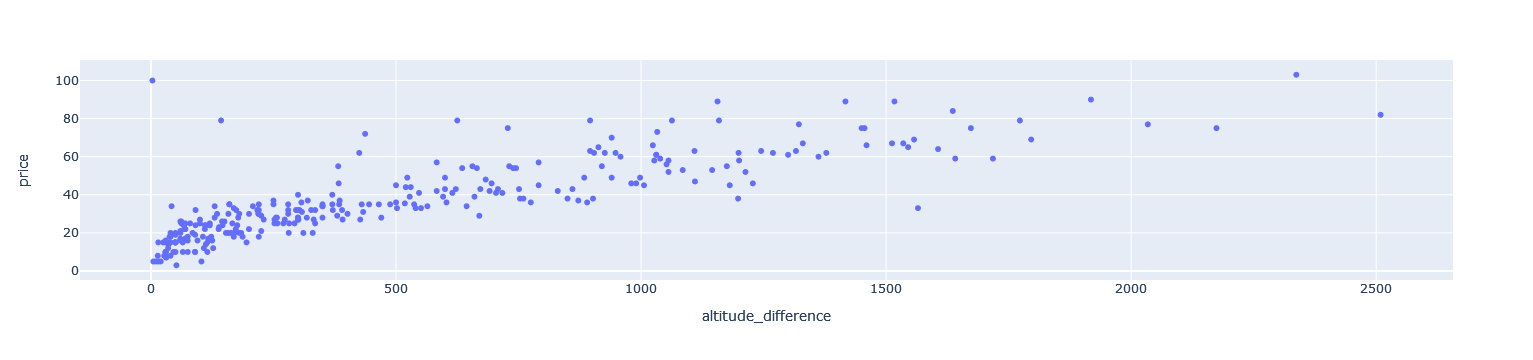

In [381]:
fig_scatter_price = px.scatter(df_price, 
                               x='altitude_difference', 
                               y='price', 
                               hover_data=['ski_resort_name'])

fig_scatter_price.update_layout(showlegend = False)

fig_scatter_price.show()

Preis und Höhendifferenz

In [382]:
var_price = pd.Series(df_price.price)
var_altitude_difference = pd.Series(df_price.altitude_difference)

pearsons_coefficient = np.corrcoef(var_price, var_altitude_difference)
print("The pearson's coeffient of the x and y inputs are: \n" ,pearsons_coefficient)

The pearson's coeffient of the x and y inputs are: 
 [[1.         0.84013292]
 [0.84013292 1.        ]]


OLS - Ordinary Least Square

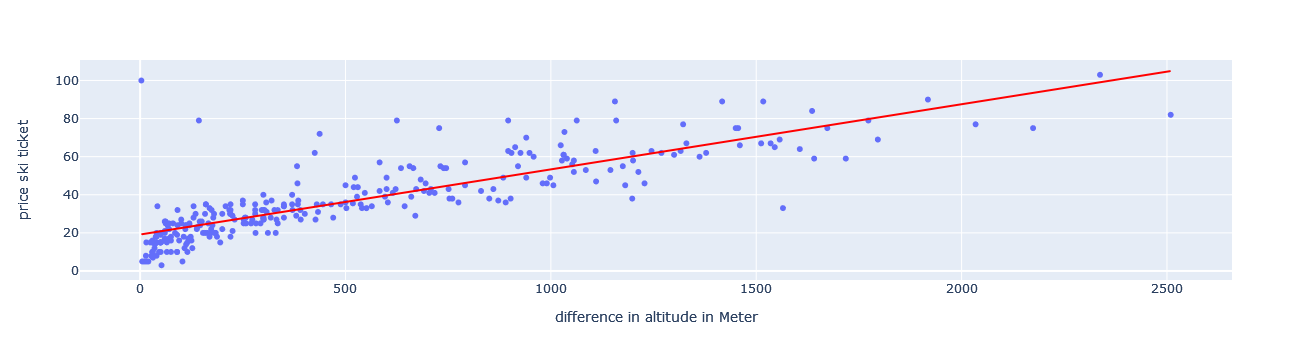

In [404]:
fig_scatter_price = px.scatter(df_price, 
                               x='altitude_difference', 
                               y='price',
                               hover_data=['ski_resort_name','altitude_difference'],
                               labels={'price':'price ski ticket', 'altitude_difference': 'difference in altitude in Meter'},
                               trendline='ols',
                               trendline_color_override="red"
                              )

fig_scatter_price.update_layout(showlegend = False)

fig_scatter_price.show()

In [405]:
rsquared_value = px.get_trendline_results(fig_scatter_price).px_fit_results.iloc[0].rsquared
rsquared_value

0.7058233299526944

In [406]:
fig_scatter_price.write_html('Scatter_price_altitude_difference.html')

#### Boxplot of value "Preise"

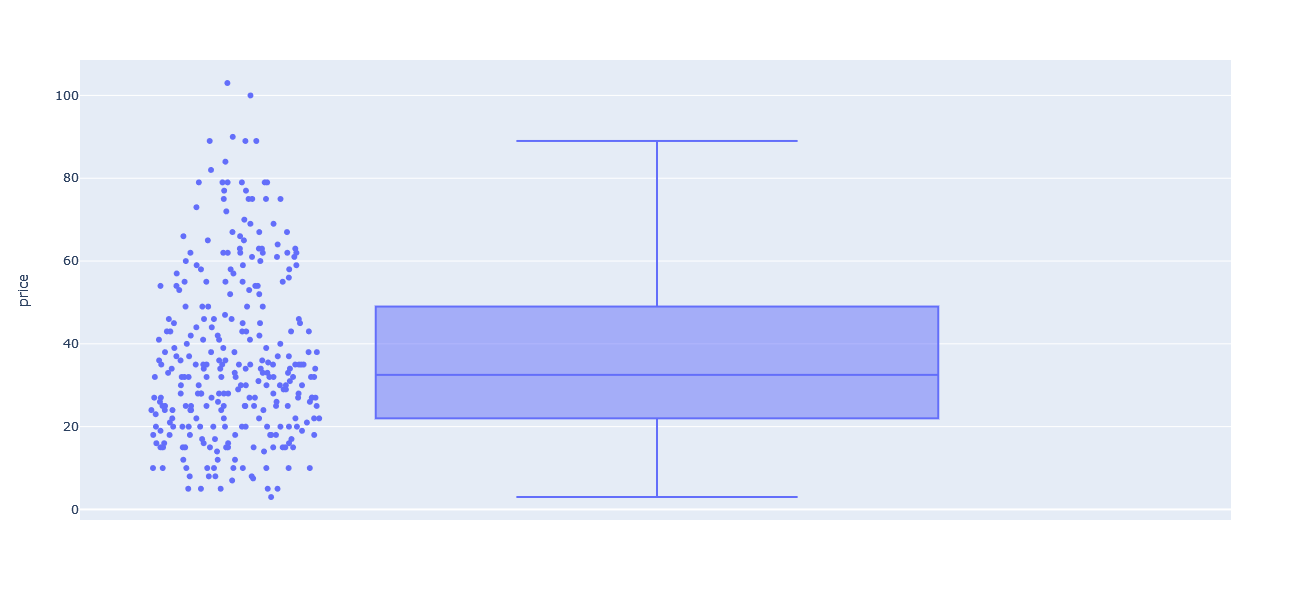

In [355]:
fig_box = px.box(df_price, 
                 y='price',
                 height=600,
                 points="all",
                hover_data =['ski_resort_name'])
fig_box.show()

In [291]:
df.columns

Index(['Skiresort_ID', 'Bergfex_ID', 'location', 'zip_code', 'ski_resort_name',
       'altitude_difference', 'lowest_point', 'highest_point',
       'total_slopes_kilometres', 'blue_slopes_kilometres',
       'red_slopes_kilometres', 'black_slopes_kilometres', 'skilift_number',
       'price', 'price_eur', 'canton', 'language_code', 'geo_shape',
       'latitude', 'longitude', 'threshold_2000', 'above_200', 'below_2000',
       'above_2000'],
      dtype='object')

### Analysis of "Pistenkilometer"

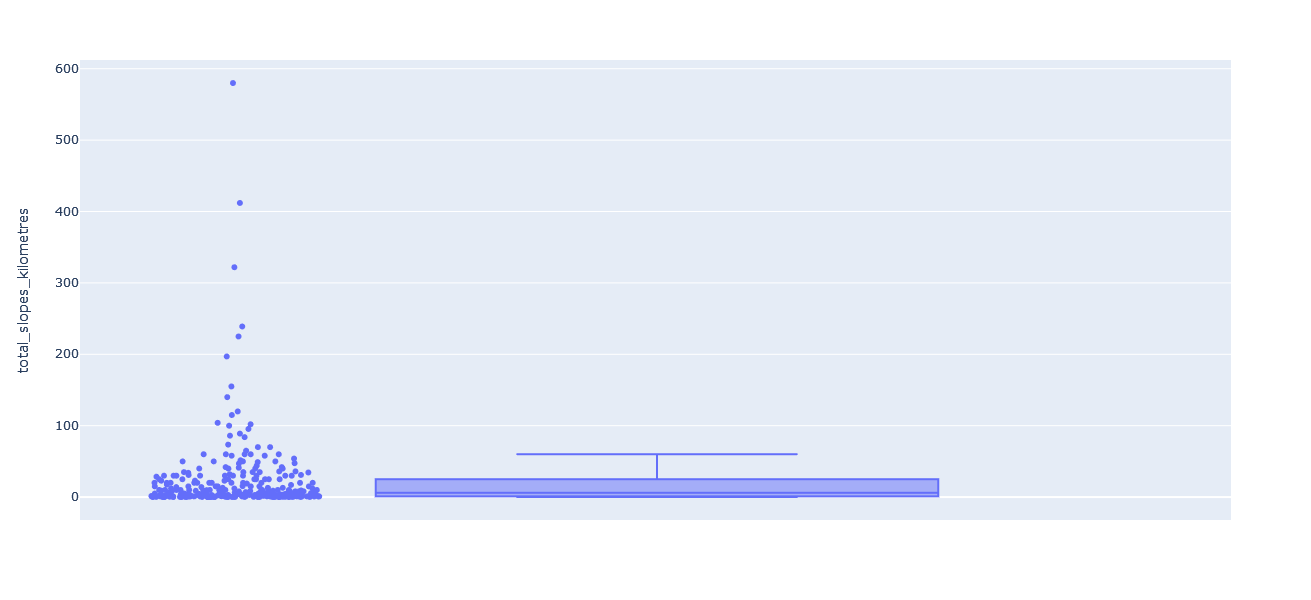

In [311]:
fig_box = px.box(df_price, 
                 y='total_slopes_kilometres',
                 height=600,
                 points="all",
                hover_data =['ski_resort_name'])
fig_box.show()

In [408]:
df_price =df_price[df_price['total_slopes_kilometres'].notna()]
df_price =df_price[df_price['price'].notna()]
df_price['ratio_total_slopes_km_price'] = df_price['total_slopes_kilometres'] / df_price['price']
df_price = df_price.sort_values(by=['ratio_total_slopes_km_price'],ascending=False)
df_price['Rank_ratio_total_slopes_km_price'] = df_price['ratio_total_slopes_km_price'].rank(method='average', ascending=False)
df_price.head()

,Skiresort_ID,Bergfex_ID,location,zip_code,ski_resort_name,altitude_difference,lowest_point,highest_point,total_slopes_kilometres,blue_slopes_kilometres,...,language_code,geo_shape,latitude,longitude,threshold_2000,above_200,below_2000,above_2000,ratio_total_slopes_km_price,Rank_ratio_total_slopes_km_price
190,191,29,Champéry,1874,Les Portes du Soleil Morzine/Avoriaz/Les Gets...,1269,985,2254,580.0,310.0,...,2,"{""coordinates"":[[[6.842025052699166,46.1319756...",46.158785,6.845954,Über 2000 Meter,1.0,0.0,1.0,9.354839,1.0
4,5,26,Verbier,1936,4 Vallees Verbier/La Tzoumaz/Nendaz/Veysonnaz...,2509,821,3330,412.0,107.0,...,2,"{""coordinates"":[[[7.279137318615009,46.0968681...",46.100790,7.229655,Über 2000 Meter,1.0,0.0,1.0,5.024390,2.0
3,4,137,Samnaun,7562,Silvretta Arena Ischgl/Samnaun Samnaun,1512,1360,2872,239.0,47.0,...,1,"{""coordinates"":[[[10.391389969430705,46.942032...",46.963293,10.402297,Über 2000 Meter,1.0,0.0,1.0,3.567164,3.0
209,210,165,Zermatt,3920,Matterhorn Cervinia/Valtournenche/Zermatt/Breu...,2337,1562,3899,322.0,75.0,...,1,"{""coordinates"":[[[7.611949494049952,46.0342901...",45.989712,7.752671,Über 2000 Meter,1.0,0.0,1.0,3.126214,4.0
15,16,12,Arosa,7050,Arosa Lenzerheide Arosa Lenzerheide Arosa,1636,1229,2865,225.0,110.0,...,1,"{""coordinates"":[[[9.664078588680754,46.7297042...",46.769850,9.668264,Über 2000 Meter,1.0,0.0,1.0,2.678571,5.0


In [409]:
df_price[['ski_resort_name','price','total_slopes_kilometres','ratio_total_slopes_km_price']].head()

,ski_resort_name,price,total_slopes_kilometres,ratio_total_slopes_km_price
190,Les Portes du Soleil Morzine/Avoriaz/Les Gets...,62.0,580.0,9.354839
4,4 Vallees Verbier/La Tzoumaz/Nendaz/Veysonnaz...,82.0,412.0,5.024390
3,Silvretta Arena Ischgl/Samnaun Samnaun,67.0,239.0,3.567164
209,Matterhorn Cervinia/Valtournenche/Zermatt/Breu...,103.0,322.0,3.126214
15,Arosa Lenzerheide Arosa Lenzerheide Arosa,84.0,225.0,2.678571


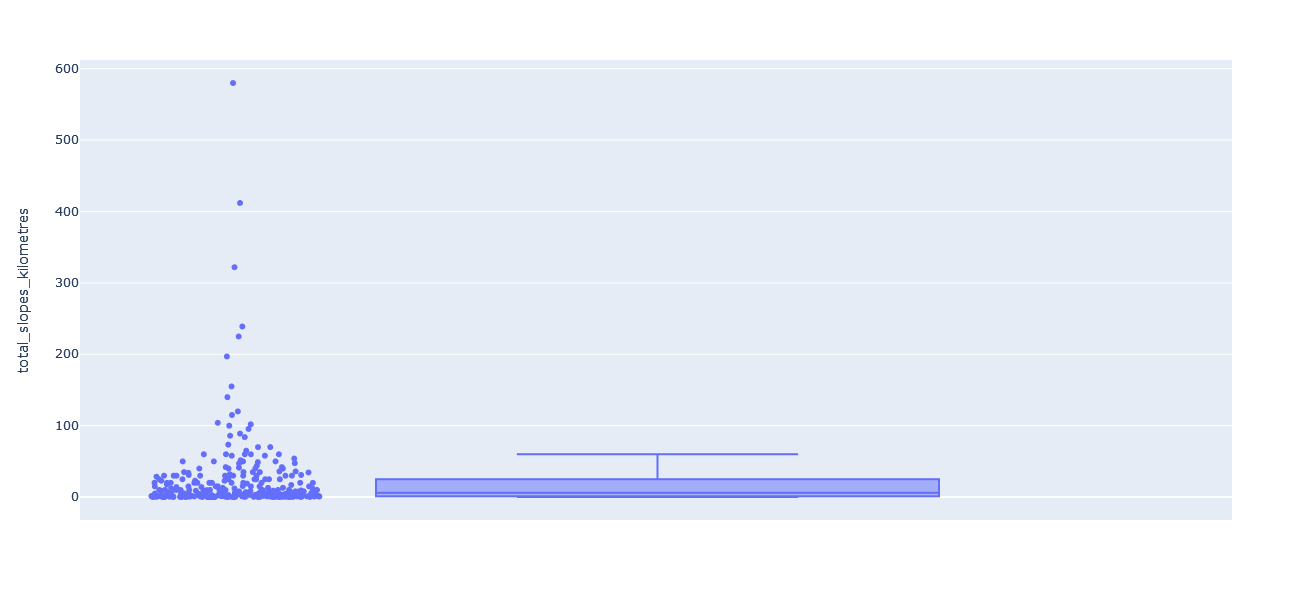

In [410]:
fig_box = px.box(df_price, 
                 y='total_slopes_kilometres',
                 height=600,
                 points="all",
                hover_data =['ski_resort_name'])
fig_box.show()

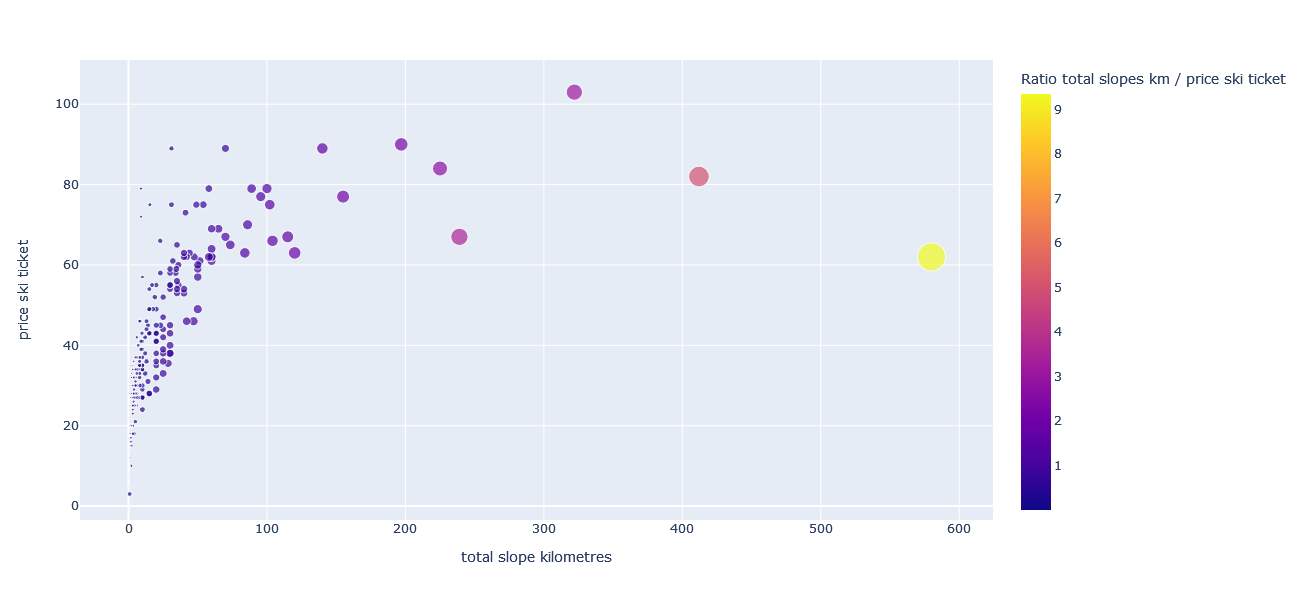

In [417]:
fig_scatter_price = px.scatter(df_price, 
                               x='total_slopes_kilometres', 
                               y='price',
                               hover_data=['ski_resort_name','ratio_total_slopes_km_price'],
                               size='ratio_total_slopes_km_price',
                               color='ratio_total_slopes_km_price',
                               labels={'price':'price ski ticket', 
                                       'total_slopes_kilometres': 'total slope kilometres', 
                                       'ratio_total_slopes_km_price':'Ratio total slopes km / price ski ticket'},   
                              height=600,
                              )

fig_scatter_price.update_layout(showlegend = False)

fig_scatter_price.show()

In [418]:
fig_scatter_price.write_html('scatter_price_ratio.html')

In [413]:
df_price.columns

Index(['Skiresort_ID', 'Bergfex_ID', 'location', 'zip_code', 'ski_resort_name',
       'altitude_difference', 'lowest_point', 'highest_point',
       'total_slopes_kilometres', 'blue_slopes_kilometres',
       'red_slopes_kilometres', 'black_slopes_kilometres', 'skilift_number',
       'price', 'price_eur', 'canton', 'language_code', 'geo_shape',
       'latitude', 'longitude', 'threshold_2000', 'above_200', 'below_2000',
       'above_2000', 'ratio_total_slopes_km_price',
       'Rank_ratio_total_slopes_km_price'],
      dtype='object')

Best ski resort for under 30 CHF

In [327]:
df_price_very_low = df_price.query('price < 30.00')
df_price_very_low[['ski_resort_name','price','ratio_total_slopes_km_price','Rank_ratio_total_slopes_km_price']].head()

,ski_resort_name,price,ratio_total_slopes_km_price,Rank_ratio_total_slopes_km_price
166,La Robella Buttes (Val de Travers),29.0,0.689655,48.0
299,Schwefelberg Badmatte/Louigrat(voruebergehenda...,28.0,0.535714,73.5
162,La Forclaz,28.0,0.535714,73.5
181,Les Breuleux,24.0,0.416667,88.0
67,Dent de Vaulion LeMorez,27.0,0.370370,92.5


#### Best ski resort for under 40 CHF

In [316]:
df_price_low = df_price.query('price < 40.00')
df_price_low[['ski_resort_name','price','ratio_total_slopes_km_price','Rank_ratio_total_slopes_km_price']].head()

,ski_resort_name,price,ratio_total_slopes_km_price,Rank_ratio_total_slopes_km_price
161,La Dôle/Les Tuffes (Jura sur Leman),35.5,0.805634,34.0
215,Moleson,38.0,0.789474,35.5
225,Nara-Leontica Leontica Leontica,38.0,0.789474,35.5
335,Vals 3000 Dachberg,33.0,0.757576,39.0
330,Tschappina/Urmein (Heinzenberg),36.0,0.694444,47.0


#### Best ski resort for under 60 CHF

In [323]:
df_price_middle = df_price.query('price < 60.00')
df_price_middle[['ski_resort_name','price','ratio_total_slopes_km_price','Rank_ratio_total_slopes_km_price']].head()

,ski_resort_name,price,ratio_total_slopes_km_price,Rank_ratio_total_slopes_km_price
14,Arolla,46.0,1.021739,20.0
224,Mythenregion Schwyz Schwyz,49.0,1.020408,21.0
85,Evolene,46.0,0.913043,28.0
133,Hoch Ybrig Unteriberg/Oberiberg Oberiberg,57.0,0.877193,29.0
251,Pizol Bad Ragaz/Wangs Bad Ragaz,59.0,0.847458,31.0


In [319]:
df_price[['ski_resort_name','price','total_slopes_kilometres','ratio_total_slopes_km_price','ratio_total_slopes_km_price']].query('ski_resort_name.str.contains("Klewenalp")', engine='python')

,ski_resort_name,price,total_slopes_kilometres,ratio_total_slopes_km_price,ratio_total_slopes_km_price
153,Klewenalp/Stockhuette Beckenried/Emmetten Bec...,54.0,40.0,0.740741,0.740741
